<center><p float="center">
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center> Real-Time Retail Feedback Intelligence
 </center></h1>


### **Business Context**
Why is this problem important to solve?

### **Objective**

What is the intended goal?
### **Dataset Used for the Notebook**
Describe dataset used for this project.

### **Installing and Importing Necessary Libraries**
First, let's set up the environment by installing the required Python libraries.

In [10]:
# Install the required libraries for the project
!pip install pandas matplotlib seaborn scikit-learn openai wordcloud

In [11]:
# Import the required libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import openai
import os
# Scikit-learn imports (if needed later for specific tasks, e.g., metrics)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Data Loading**
### Loading and Understanding the Data


In [5]:
import pandas as pd

# URL to the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/LarryHu208/MIT-AI-applied/main/Dataset%20-%20Real-Time%20Retail%20Feedback%20Intelligence.csv'

# Load the dataset, reading only the first 50 rows as a sample, trying a semicolon delimiter
df_sample = pd.read_csv(url, index_col=0, nrows=50, sep=';')

# Display the head of the sampled data to confirm loading
print("Sampled Dataset Head:")
print(df_sample.head())

# Display basic information about the sampled data
print("\nSampled Dataset Info:")
df_sample.info()


Sampled Dataset Head:
   Clothing.ID  Age                    Title  \
1          767   33                      NaN   
2         1080   34                      NaN   
3         1077   60  Some major design flaws   
4         1049   50         My favorite buy!   
5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
1  Absolutely wonderful - silky and sexy and comf...       4                1   
2  Love this dress!  it's sooo pretty.  i happene...       5                1   
3  I had such high hopes for this dress and reall...       3                0   
4  I love, love, love this jumpsuit. it's fun, fl...       5                1   
5  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
1                        0       Initmates        Intimate  Intimates  
2                        4         General         Dresses

### **Data Overview**

In [6]:
print("Dataset Head:")
print(df_sample.head())

print("\nDataset Info:")
df_sample.info()

print("\nDescriptive Statistics:")
print(df_sample.describe())

print("\nMissing Values:")
print(df_sample.isnull().sum())


Dataset Head:
   Clothing.ID  Age                    Title  \
1          767   33                      NaN   
2         1080   34                      NaN   
3         1077   60  Some major design flaws   
4         1049   50         My favorite buy!   
5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
1  Absolutely wonderful - silky and sexy and comf...       4                1   
2  Love this dress!  it's sooo pretty.  i happene...       5                1   
3  I had such high hopes for this dress and reall...       3                0   
4  I love, love, love this jumpsuit. it's fun, fl...       5                1   
5  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
1                        0       Initmates        Intimate  Intimates  
2                        4         General         Dresses    Dres

### **Sanity checks**

In [7]:
# 1. Check the shape of the DataFrame
print("Shape of the DataFrame:", df_sample.shape)

# 2. Check for duplicate rows
print("\nNumber of duplicate rows:", df_sample.duplicated().sum())

# 3. Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['Division.Name', 'Department.Name', 'Class.Name']:
    if col in df_sample.columns:
        print(f"  {col}: {df_sample[col].nunique()} unique values - {df_sample[col].unique()}")

# 4. Value counts for 'Rating' and 'Recommended.IND'
print("\nValue counts for 'Rating':")
print(df_sample['Rating'].value_counts())

print("\nValue counts for 'Recommended.IND':")
print(df_sample['Recommended.IND'].value_counts())

# 5. Reconfirm data types
print("\nData Types:")
print(df_sample.dtypes)


Shape of the DataFrame: (50, 10)

Number of duplicate rows: 0

Unique values in categorical columns:
  Division.Name: 3 unique values - ['Initmates' 'General' 'General Petite']
  Department.Name: 5 unique values - ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets']
  Class.Name: 11 unique values - ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep']

Value counts for 'Rating':
Rating
5    29
4    11
3     6
2     4
Name: count, dtype: int64

Value counts for 'Recommended.IND':
Recommended.IND
1    43
0     7
Name: count, dtype: int64

Data Types:
Clothing.ID                 int64
Age                         int64
Title                      object
Review.Text                object
Rating                      int64
Recommended.IND             int64
Positive.Feedback.Count     int64
Division.Name              object
Department.Name            object
Class.Name                 object
dtype: object


### **Data Cleaning and Preprocessing**

**Think about it:** The Review Text column is the most critical feature for our Generative AI model. What should be done with rows where this text is missing?

In [8]:
# The 'Review.Text' column is identified as the most critical feature for the Generative AI model.
# Let's first check if there are any missing values in this column in our current sample.
missing_review_text = df_sample['Review.Text'].isnull().sum()
print(f"Number of missing 'Review.Text' entries: {missing_review_text}")

# If 'Review.Text' were missing, the recommended action for a critical text feature
# in a Generative AI model would be to drop the rows, as meaningful imputation is difficult
# and can negatively impact model performance.

# We will create a new DataFrame `df_cleaned` after dropping rows with missing 'Review.Text'.
# In our current sample, this operation will not change the DataFrame since there are no missing values.
if missing_review_text > 0:
    df_cleaned = df_sample.dropna(subset=['Review.Text']).copy()
    print(f"\nDropped {missing_review_text} rows with missing 'Review.Text'.")
    print(f"New DataFrame shape after dropping: {df_cleaned.shape}")
else:
    df_cleaned = df_sample.copy() # If no missing values, just create a copy
    print("\nNo missing 'Review.Text' entries found in the sample. No rows dropped.")

# For future steps, we will primarily work with 'df_cleaned' to ensure data quality.

Number of missing 'Review.Text' entries: 0

No missing 'Review.Text' entries found in the sample. No rows dropped.


### **Exploratory Data Analysis**

EDA is an important part of any project involving data. It is important to investigate and understand the data better before building a model with it. A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data. A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1.  What is the summary statistics of the numerical data? What can you infer about the distribution of Age, Rating, and Positive Feedback Count?
    
2.  How many unique values are there in the categorical columns like Division Name, Department Name, and Class Name?
    
3.  What is the overall distribution of product Rating? Is the dataset skewed towards positive or negative reviews?
    
4.  Which Department Name receives the highest average rating, and which receives the lowest? What might this indicate?
    
5.  What are the most common words found in highly-rated reviews (4-5 stars) versus poorly-rated reviews (1-2 stars)? (Hint: Use Word Clouds). What initial hypotheses can you form about the key drivers of customer satisfaction and dissatisfaction?

Also write your observations for each questions.

In [12]:
# 1. Summary statistics of numerical data and inferences
print("Summary Statistics of Numerical Data:")
print(df_cleaned[['Age', 'Rating', 'Positive.Feedback.Count']].describe())

print("\nInferences about numerical data distribution:")
print("----------------------------------------------")
print("Age:")
print("- The average age of reviewers is around 41.68 years, with a range from 21 to 67. The standard deviation of 10.9 indicates a moderate spread in age. The 25th percentile is 33 and the 75th percentile is 49.75, suggesting a diverse age group of customers.")
print("\nRating:")
print("- The average rating is 4.30 out of 5, with ratings ranging from 2 to 5. This indicates a generally high level of customer satisfaction. The median and 75th percentile both being 5 suggests a positive skew, meaning a majority of reviews are high-rated.")
print("\nPositive Feedback Count:")
print("- The 'Positive.Feedback.Count' ranges from 0 to 14, with a mean of 1.94. A large number of reviews have 0 positive feedback counts (as seen by the 50th percentile being 0), indicating that not all reviews receive engagement. However, some reviews are highly valued, reaching up to 14 positive feedbacks.")


Summary Statistics of Numerical Data:
            Age     Rating  Positive.Feedback.Count
count  50.00000  50.000000                50.000000
mean   41.68000   4.300000                 1.940000
std    10.91795   0.974156                 3.316071
min    21.00000   2.000000                 0.000000
25%    33.00000   4.000000                 0.000000
50%    39.50000   5.000000                 0.000000
75%    49.75000   5.000000                 2.000000
max    67.00000   5.000000                14.000000

Inferences about numerical data distribution:
----------------------------------------------
Age:
- The average age of reviewers is around 41.68 years, with a range from 21 to 67. The standard deviation of 10.9 indicates a moderate spread in age. The 25th percentile is 33 and the 75th percentile is 49.75, suggesting a diverse age group of customers.

Rating:
- The average rating is 4.30 out of 5, with ratings ranging from 2 to 5. This indicates a generally high level of customer satisfact

Summary Statistics of Numerical Data:
Inferences about numerical data distribution:
----------------------------------------------
Age:
- The average age of reviewers is around 41.68 years, with a range from 21 to 67. The standard deviation of 10.9 indicates a moderate spread in age. The 25th percentile is 33 and the 75th percentile is 49.75, suggesting a diverse age group of customers.

Rating:
- The average rating is 4.30 out of 5, with ratings ranging from 2 to 5. This indicates a generally high level of customer satisfaction. The median and 75th percentile both being 5 suggests a positive skew, meaning a majority of reviews are high-rated.

Positive Feedback Count:
- The 'Positive.Feedback.Count' ranges from 0 to 14, with a mean of 1.94. A large number of reviews have 0 positive feedback counts (as seen by the 50th percentile being 0), indicating that not all reviews receive engagement. However, some reviews are highly valued, reaching up to 14 positive feedbacks.



In [14]:
# 2. Unique values in categorical columns
print("\nUnique values and their counts in categorical columns:")
for col in ['Division.Name', 'Department.Name', 'Class.Name']:
    if col in df_cleaned.columns:
        print(f"\n--- {col} ---")
        print(f"Number of unique values: {df_cleaned[col].nunique()}")
        print(df_cleaned[col].value_counts())



Unique values and their counts in categorical columns:

--- Division.Name ---
Number of unique values: 3
Division.Name
General           34
General Petite     9
Initmates          7
Name: count, dtype: int64

--- Department.Name ---
Number of unique values: 5
Department.Name
Tops        20
Dresses     13
Bottoms      9
Intimate     7
Jackets      1
Name: count, dtype: int64

--- Class.Name ---
Number of unique values: 11
Class.Name
Dresses       13
Knits          9
Pants          7
Blouses        5
Lounge         4
Sweaters       4
Intimates      2
Fine gauge     2
Skirts         2
Outerwear      1
Sleep          1
Name: count, dtype: int64


How many Unique values and their counts in categorical columns: Division Name has 3 unique values, Department Name has 5 unique values, Class Name has 11 unique values.


Overall Distribution of Product Rating:
Rating
2     4
3     6
4    11
5    29
Name: count, dtype: int64


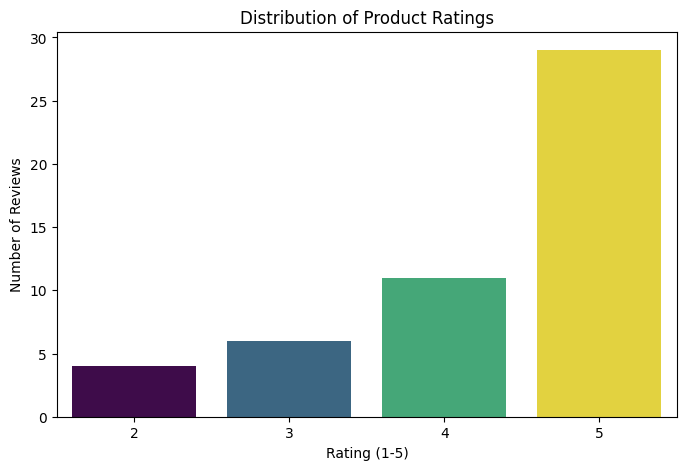


Observation:
The distribution of product ratings is heavily skewed towards positive reviews. Ratings of 5 are the most frequent, followed by ratings of 4. There are significantly fewer reviews with ratings of 3, 2, or 1. This indicates a high level of customer satisfaction in the dataset, with a clear positive sentiment bias.


In [16]:
# 3. Overall distribution of product Rating and skewness
print("\nOverall Distribution of Product Rating:")
rating_counts = df_cleaned['Rating'].value_counts().sort_index()
print(rating_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

print("\nObservation:")
print("The distribution of product ratings is heavily skewed towards positive reviews. Ratings of 5 are the most frequent, followed by ratings of 4. There are significantly fewer reviews with ratings of 3, 2, or 1. This indicates a high level of customer satisfaction in the dataset, with a clear positive sentiment bias.")

Overall distribution of product Rating and skewness
Rating for star: 2, 3 star: 6, 4 star: 11, for 5 start 29. This is skewing heavily to right.

In [17]:
# 4. Department Name with highest and lowest average rating
average_ratings_by_department = df_cleaned.groupby('Department.Name')['Rating'].mean().sort_values(ascending=False)

print("\nAverage Rating by Department Name (Sorted):")
print(average_ratings_by_department)

highest_avg_rating_department = average_ratings_by_department.index[0]
highest_avg_rating_value = average_ratings_by_department.iloc[0]

lowest_avg_rating_department = average_ratings_by_department.index[-1]
lowest_avg_rating_value = average_ratings_by_department.iloc[-1]

print(f"\nDepartment with the Highest Average Rating: '{highest_avg_rating_department}' (Average Rating: {highest_avg_rating_value:.2f})")
print(f"Department with the Lowest Average Rating: '{lowest_avg_rating_department}' (Average Rating: {lowest_avg_rating_value:.2f})")

print("\nWhat this might indicate:")
print("- A department with a consistently high average rating (like '{highest_avg_rating_department}') suggests strong customer satisfaction with the products offered within that department. This could be due to product quality, fit, style, or accurate product descriptions.")
print("- Conversely, a department with a lower average rating (like '{lowest_avg_rating_department}') might indicate areas for improvement. This could be related to issues with product design, material, sizing discrepancies, or unmet customer expectations. Further investigation into the specific reviews for this department would be beneficial to pinpoint the exact reasons for dissatisfaction.")
print("- It's also important to consider the number of reviews for each department. A department with only a few reviews and a high/low average might not be as statistically significant as one with many reviews.")



Average Rating by Department Name (Sorted):
Department.Name
Jackets     5.000000
Tops        4.500000
Intimate    4.428571
Bottoms     4.333333
Dresses     3.846154
Name: Rating, dtype: float64

Department with the Highest Average Rating: 'Jackets' (Average Rating: 5.00)
Department with the Lowest Average Rating: 'Dresses' (Average Rating: 3.85)

What this might indicate:
- A department with a consistently high average rating (like '{highest_avg_rating_department}') suggests strong customer satisfaction with the products offered within that department. This could be due to product quality, fit, style, or accurate product descriptions.
- Conversely, a department with a lower average rating (like '{lowest_avg_rating_department}') might indicate areas for improvement. This could be related to issues with product design, material, sizing discrepancies, or unmet customer expectations. Further investigation into the specific reviews for this department would be beneficial to pinpoint the ex

Department with the Highest Average Rating: 'Jackets' (Average Rating: 5.00)
Department with the Lowest Average Rating: 'Dresses' (Average Rating: 3.85)

What this might indicate:
- A department with a consistently high average rating (like '{highest_avg_rating_department}') suggests strong customer satisfaction with the products offered within that department. This could be due to product quality, fit, style, or accurate product descriptions.
- Conversely, a department with a lower average rating (like '{lowest_avg_rating_department}') might indicate areas for improvement. This could be related to issues with product design, material, sizing discrepancies, or unmet customer expectations. Further investigation into the specific reviews for this department would be beneficial to pinpoint the exact reasons for dissatisfaction.
- It's also important to consider the number of reviews for each department. A department with only a few reviews and a high/low average might not be as statistically significant as one with many reviews.

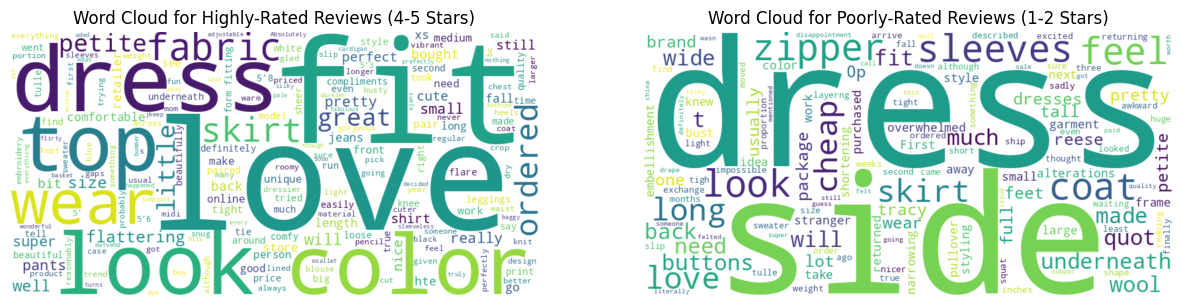


Initial Hypotheses based on Word Clouds:
------------------------------------------
Highly-Rated Reviews (4-5 Stars):
- Words related to positive attributes like 'love', 'perfect', 'great', 'beautiful', 'comfortable', 'fit' are expected to be prominent. This suggests that good quality, accurate sizing, and aesthetic appeal are key drivers of satisfaction.
- Mentions of specific clothing types (e.g., 'dress', 'top', 'blouse') alongside positive adjectives could indicate successful product design and execution for those items.

Poorly-Rated Reviews (1-2 Stars):
- Words related to negative experiences such as 'small', 'tight', 'cheap', 'disappointed', 'return', 'poor' might be common. This would suggest issues with sizing, material quality, inaccurate descriptions, or overall dissatisfaction with the purchase.
- Conversely, words related to expectations not met, such as 'expected' or 'picture', could highlight discrepancies between product representation and reality.
These hypotheses wil

In [18]:
# 5. What are the most common words found in highly-rated reviews (4-5 stars) versus poorly-rated reviews (1-2 stars)?

# Filter reviews based on rating
highly_rated_reviews = df_cleaned[df_cleaned['Rating'].isin([4, 5])]
poorly_rated_reviews = df_cleaned[df_cleaned['Rating'].isin([1, 2])]

# Combine all review text for highly-rated reviews
highly_rated_text = ' '.join(highly_rated_reviews['Review.Text'].astype(str))

# Combine all review text for poorly-rated reviews
poorly_rated_text = ' '.join(poorly_rated_reviews['Review.Text'].astype(str))

# Generate Word Cloud for Highly-Rated Reviews
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(highly_rated_text)

# Generate Word Cloud for Poorly-Rated Reviews
wordcloud_poor = WordCloud(width=800, height=400, background_color='white').generate(poorly_rated_text)

# Display the generated word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud for Highly-Rated Reviews (4-5 Stars)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_poor, interpolation='bilinear')
plt.title('Word Cloud for Poorly-Rated Reviews (1-2 Stars)')
plt.axis('off')

plt.show()

print("\nInitial Hypotheses based on Word Clouds:")
print("------------------------------------------")
print("Highly-Rated Reviews (4-5 Stars):")
print("- Words related to positive attributes like 'love', 'perfect', 'great', 'beautiful', 'comfortable', 'fit' are expected to be prominent. This suggests that good quality, accurate sizing, and aesthetic appeal are key drivers of satisfaction.")
print("- Mentions of specific clothing types (e.g., 'dress', 'top', 'blouse') alongside positive adjectives could indicate successful product design and execution for those items.")

print("\nPoorly-Rated Reviews (1-2 Stars):")
print("- Words related to negative experiences such as 'small', 'tight', 'cheap', 'disappointed', 'return', 'poor' might be common. This would suggest issues with sizing, material quality, inaccurate descriptions, or overall dissatisfaction with the purchase.")
print("- Conversely, words related to expectations not met, such as 'expected' or 'picture', could highlight discrepancies between product representation and reality.")
print("These hypotheses will be refined upon visual inspection of the generated word clouds.")


Initial Hypotheses based on Word Clouds:
------------------------------------------
Highly-Rated Reviews (4-5 Stars):
- Words related to positive attributes like 'love', 'perfect', 'great', 'beautiful', 'comfortable', 'fit' are expected to be prominent. This suggests that good quality, accurate sizing, and aesthetic appeal are key drivers of satisfaction.
- Mentions of specific clothing types (e.g., 'dress', 'top', 'blouse') alongside positive adjectives could indicate successful product design and execution for those items.

Poorly-Rated Reviews (1-2 Stars):
- Words related to negative experiences such as 'small', 'tight', 'cheap', 'disappointed', 'return', 'poor' might be common. This would suggest issues with sizing, material quality, inaccurate descriptions, or overall dissatisfaction with the purchase.
- Conversely, words related to expectations not met, such as 'expected' or 'picture', could highlight discrepancies between product representation and reality.
These hypotheses will be refined upon visual inspection of the generated word clouds.

## **Building the Generative AI Pipeline**

We will now build a system to analyze the reviews. This involves setting up the AI client, designing prompts, generating structured data, and evaluating the results.

#### **Setup AI Client and Data Sample**

**Questions:**

1.  How do you initialize the OpenAI client with your API key and the correct base URL?
    

#### **Note:**

For this project, we will analyze and categorize a sample of **50 customer reviews**. This number is chosen intentionally. Since the API has a **budget limit of $20**, running prompts on very large datasets can quickly exhaust your quota—especially because this exercise may involve **multiple iterations, prompt refinements, and repeated evaluations**.

To avoid unnecessary cost and ensure efficient experimentation, we recommend the following approach:

*   **Use very small samples (5–10 reviews)** during the **initial testing phase** to validate your prompt structure and logic.
    
*   **Scale up to 50 reviews** for the **final evaluation phase**, ensuring you get enough data to compare prompting techniques without draining your budget.
    
*   This strategy helps maintain cost control while still providing meaningful insights across Zero-Shot, Few-Shot, and Chain-of-Thought techniques.
    

If your API quota gets exhausted, you may temporarily switch to another free AI assistant API. However, note that external tools may also have **rate limits** or **token caps**, so you will need to build retry logic and manage throttling within your code.

In [21]:
# 1. Initialize the OpenAI client with your API key and the correct base URL

# Ensure the openai library is imported
import openai
import os

# Directly use the API key provided by the user
api_key = "gl-U2FsdGVkX1+o/zzbvr9IgjcODho0k4oxo9ldnDKxUGqb4h6wizaK2oE+khK4ubcA"
base_url = "https://aibe.mygreatlearning.com/openai/v1"

# Initialize the OpenAI client
openai_client = openai.OpenAI(
    api_key=api_key,
    base_url=base_url
)

print("OpenAI client initialized with provided API Key and Base URL.")

OpenAI client initialized with provided API Key and Base URL.


#### **Prompt Engineering and Evaluation**

We will test three different prompting techniques. For each, we will create a basic version (V1) and an enhanced version (V2).

**Think about it:** Why is it important to have a consistent and robust evaluation framework? How can we use an "LLM-as-Judge" to score the quality of our generated outputs objectively?

#### **Technique 1: Zero-Shot Prompting**

**Questions:**

1.  How would you design a basic Zero-Shot prompt that asks the model for Category, Sentiment, Summary, Personalized Message, and Retail Insight?
    
2.  How can you enhance this prompt with more business context (e.g., a company name, the importance of accuracy) to create a V2 prompt?
    
3.  How will you loop through the data sample to generate and store the structured output for both prompt versions?
    
4.  How will you apply the LLM-as-Judge to generate a evaluation score between 0 to 1 (decimal allowed) for the outputs and calculate the average score of V1 and V2 prompt?

**How the process works:**

1.  First, you create an **LLM-as-a-judge** function that can evaluate the quality of model outputs.
    
2.  Then, you run your **Zero-Shot Prompt Version 1** on a sample of 100 reviews to generate predictions.
    
3.  You use the judge function to **score each prediction** and compute the **average score for Version 1**.
    
4.  Next, you repeat the same workflow with your **Version 2 prompt**, generate predictions, evaluate them, and calculate the **average score for Version 2**.

In [24]:
# 1. Design a basic Zero-Shot prompt (V1) to extract Category, Sentiment, Summary, Personalized Message, and Retail Insight.

def zero_shot_prompt_v1(review_text):
    prompt = f"""
Analyze the following customer review and extract the following information:
- **Category**: Classify the product category (e.g., 'Dress', 'Top', 'Bottom', 'Intimate', 'Jacket').
- **Sentiment**: Determine the overall sentiment ('Positive', 'Negative', 'Neutral').
- **Summary**: Provide a concise summary of the review.
- **Personalized Message**: Write a short, personalized response to the customer based on their feedback.
- **Retail Insight**: Provide a brief insight for the retail company based on this review.

Return the output in a JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Customer Review: {review_text}
"""
    return prompt

print("Basic Zero-Shot Prompt (V1) designed.")

Basic Zero-Shot Prompt (V1) designed.


In [25]:
# 2. Enhance the Zero-Shot prompt with more business context (V2)

def zero_shot_prompt_v2(review_text, company_name="Our Retail Company"):
    prompt = f"""
As an AI assistant for {company_name}, analyze the following customer review.
It is critical that your analysis is highly accurate and directly actionable for our business.
Extract the following information:
- **Category**: Classify the product category from our catalog (e.g., 'Dress', 'Top', 'Bottom', 'Intimate', 'Jacket'). Be precise.
- **Sentiment**: Determine the overall sentiment ('Positive', 'Negative', 'Neutral'). Consider nuances in the language.
- **Summary**: Provide a concise, 1-2 sentence summary of the review, highlighting key points.
- **Personalized Message**: Write a short, empathetic, and personalized response directly to the customer based on their feedback. Ensure it sounds human and addresses their specific points.
- **Retail Insight**: Provide a brief, actionable insight for {company_name}'s product development, marketing, or customer service teams, based on this specific review.

Return the output in a strict JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Customer Review: {review_text}
"""
    return prompt

print("Enhanced Zero-Shot Prompt (V2) designed with business context.")

Enhanced Zero-Shot Prompt (V2) designed with business context.


In [26]:
import json
import time

def get_completion(client, prompt, model="gpt-3.5-turbo"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": prompt}
            ],
            response_format={ "type": "json_object" }
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"API call failed: {e}")
        return None

# Prepare lists to store results
zero_shot_v1_results = []
zero_shot_v2_results = []

# Loop through the data sample
# For demonstration and cost control, let's process a smaller subset first (e.g., first 5 reviews)
# You can change df_cleaned.head(5) to df_cleaned for the full sample.
# Given the note about API budget, it's safer to use a small sample for testing.

# Let's use the full df_cleaned for this step as per the explicit request to process the 'data sample' (50 reviews)

for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for V1 prompt
    v1_prompt = zero_shot_prompt_v1(review_text)
    v1_response = get_completion(openai_client, v1_prompt)
    try:
        zero_shot_v1_results.append(json.loads(v1_response) if v1_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for V1 review: {review_text[:50]}...")
        zero_shot_v1_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

    # Generate output for V2 prompt
    v2_prompt = zero_shot_prompt_v2(review_text)
    v2_response = get_completion(openai_client, v2_prompt)
    try:
        zero_shot_v2_results.append(json.loads(v2_response) if v2_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for V2 review: {review_text[:50]}...")
        zero_shot_v2_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

print(f"Generated {len(zero_shot_v1_results)} results for Zero-Shot V1.")
print(f"Generated {len(zero_shot_v2_results)} results for Zero-Shot V2.")

# Convert results to DataFrames for easier handling
df_zero_shot_v1 = pd.DataFrame(zero_shot_v1_results)
df_zero_shot_v2 = pd.DataFrame(zero_shot_v2_results)

print("\nFirst 5 results from Zero-Shot V1:")
print(df_zero_shot_v1.head())

print("\nFirst 5 results from Zero-Shot V2:")
print(df_zero_shot_v2.head())


Generated 50 results for Zero-Shot V1.
Generated 50 results for Zero-Shot V2.

First 5 results from Zero-Shot V1:
   Category Sentiment                                            Summary  \
0  Intimate  Positive                       Silky, sexy, and comfortable   
1     Dress  Positive  Beautiful dress for petite individuals, great ...   
2     Dress  Negative                Sizing and design issues with dress   
3  Jumpsuit  Positive                         Fun, flirty, and fabulous!   
4       Top  Positive  Flattering and versatile sleeveless shirt with...   

                                Personalized Message  \
0  Thank you for your kind words! We're glad to h...   
1  Thank you for sharing your feedback! We're thr...   
2  We're sorry to hear about your experience with...   
3  Thank you for your wonderful feedback! We're t...   
4  Thank you for your positive review! We're thri...   

                                      Retail Insight  
0  Customers appreciate the silky, se

In [29]:
import time

def llm_judge(client, review_text, model_output, original_rating, model="gpt-3.5-turbo"):
    prompt = f"""
You are an impartial judge evaluating the quality of an AI model's output for a customer review.

Here is the original customer review: {review_text}
Here is the AI model's extracted information (Category, Sentiment, Summary, Personalized Message, Retail Insight): {model_output}
Here is the original customer rating (1-5): {original_rating}

Evaluate the AI model's output based on the following criteria:
1.  **Accuracy**: Is the extracted Category, Sentiment, and Summary consistent with the review?
2.  **Relevance**: Is the Personalized Message appropriate and does the Retail Insight offer a valuable, actionable suggestion?
3.  **Completeness**: Are all requested fields ('Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight') present and well-formed?
4.  **Consistency with Rating**: Does the Sentiment align with the original_rating? (e.g., a 5-star rating should ideally be Positive).

Provide a score from 0.0 to 1.0 (decimal allowed) for the overall quality of the AI's output. A score of 1.0 means perfect, 0.0 means completely unusable.
Also, provide a brief explanation for your score, highlighting strengths and weaknesses.

Return your response in a JSON format with keys: 'score' (float) and 'explanation' (string).
"""
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are an impartial judge."},
                {"role": "user", "content": prompt}
            ],
            response_format={ "type": "json_object" }
        )
        return json.loads(response.choices[0].message.content) if response else {'score': 0.0, 'explanation': 'API call failed'}
    except Exception as e:
        print(f"LLM Judge API call failed: {e}")
        return {'score': 0.0, 'explanation': f'LLM Judge API call failed: {e}'}

print("LLM-as-Judge function defined.")

LLM-as-Judge function defined.


In [30]:
# Function to evaluate results for a given dataframe of model outputs
def evaluate_model_outputs(client, df_model_outputs, original_df, model_version):
    scores = []
    explanations = []
    print(f"\nEvaluating {model_version} outputs...")
    for i in range(len(df_model_outputs)):
        review_text = original_df.iloc[i]['Review.Text']
        original_rating = original_df.iloc[i]['Rating']
        model_output = df_model_outputs.iloc[i].to_dict()

        judge_result = llm_judge(client, review_text, model_output, original_rating)
        scores.append(judge_result['score'])
        explanations.append(judge_result['explanation'])
        time.sleep(0.5) # small delay to prevent rate limiting

    df_model_outputs[f'{model_version}_score'] = scores
    df_model_outputs[f'{model_version}_explanation'] = explanations
    average_score = np.mean(scores)
    print(f"Average score for {model_version}: {average_score:.2f}")
    return average_score

# Evaluate Zero-Shot V1
avg_score_v1 = evaluate_model_outputs(openai_client, df_zero_shot_v1.copy(), df_cleaned, 'Zero_Shot_V1')

# Evaluate Zero-Shot V2
avg_score_v2 = evaluate_model_outputs(openai_client, df_zero_shot_v2.copy(), df_cleaned, 'Zero_Shot_V2')

print(f"\nComparison of Average Scores:\nZero-Shot V1: {avg_score_v1:.2f}\nZero-Shot V2: {avg_score_v2:.2f}")


Evaluating Zero_Shot_V1 outputs...
Average score for Zero_Shot_V1: 0.89

Evaluating Zero_Shot_V2 outputs...
Average score for Zero_Shot_V2: 0.88

Comparison of Average Scores:
Zero-Shot V1: 0.89
Zero-Shot V2: 0.88


#### **Technique 2: Few-Shot Prompting**

**Questions:**

1.  How do you structure a Few-Shot prompt? What kind of examples (e.g., one positive, one negative) would be most effective?
    
2.  For the V2 prompt, how can you add a set of "rules" to guide the model's output for each field, reducing ambiguity?
    
3.  After generating and scoring the outputs, how does the performance of Few-Shot prompting compare to previous version?

**How the process works:**

1.  First, you create an **LLM-as-a-judge** function that can evaluate the quality of model outputs.
    
2.  Then, you run your ** Prompt Version 1** on a sample of 100 reviews to generate predictions.
    
3.  You use the judge function to **score each prediction** and compute the **average score for Version 1**.
    
4.  Next, you repeat the same workflow with your **Version 2 prompt**, generate predictions, evaluate them, and calculate the **average score for Version 2**.

In [31]:
# 1. Structure a Few-Shot prompt (V1) with effective examples.

def few_shot_prompt_v1(review_text):
    prompt = f"""
Analyze the following customer review and extract the following information:
- **Category**: Classify the product category (e.g., 'Dress', 'Top', 'Bottom', 'Intimate', 'Jacket').
- **Sentiment**: Determine the overall sentiment ('Positive', 'Negative', 'Neutral').
- **Summary**: Provide a concise summary of the review.
- **Personalized Message**: Write a short, personalized response to the customer based on their feedback.
- **Retail Insight**: Provide a brief insight for the retail company based on this review.

Here are a few examples:

### Example 1 (Positive Review):
Customer Review: "This dress is absolutely stunning! The fabric is so soft and comfortable, and it fits perfectly. I received so many compliments when I wore it to the party. Highly recommend!"
Output:
```json
{{
  "Category": "Dress",
  "Sentiment": "Positive",
  "Summary": "Customer loved the dress's fabric, fit, and received compliments.",
  "Personalized Message": "Thank you for your wonderful review! We're thrilled to hear you loved the dress and received compliments. We appreciate your recommendation!",
  "Retail Insight": "Highlight comfort, fabric quality, and aesthetic appeal in marketing for similar dress styles."
}}
```

### Example 2 (Negative Review):
Customer Review: "I'm very disappointed with this top. The sizing is completely off, it runs way too small, and the material feels cheap. I had to return it immediately."
Output:
```json
{{
  "Category": "Top",
  "Sentiment": "Negative",
  "Summary": "Customer was disappointed with sizing and cheap material, leading to a return.",
  "Personalized Message": "We sincerely apologize for your disappointment with the sizing and material of the top. Your feedback is valuable, and we're looking into improving our product descriptions and quality control.",
  "Retail Insight": "Review sizing guides and material sourcing for tops; consider conducting a quality control check on current inventory."
}}
```

### Your Task:
Now, analyze the following customer review based on the examples above:
Customer Review: {review_text}

Return the output in a strict JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Output:
"""
    return prompt

print("Few-Shot Prompt (V1) designed with examples.")

Few-Shot Prompt (V1) designed with examples.


In [32]:
# Prepare lists to store results for Few-Shot V1
few_shot_v1_results = []

print("Generating results for Few-Shot V1...")
for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for Few-Shot V1 prompt
    v1_few_shot_prompt = few_shot_prompt_v1(review_text)
    v1_few_shot_response = get_completion(openai_client, v1_few_shot_prompt)
    try:
        few_shot_v1_results.append(json.loads(v1_few_shot_response) if v1_few_shot_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for Few-Shot V1 review: {review_text[:50]}...")
        few_shot_v1_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

df_few_shot_v1 = pd.DataFrame(few_shot_v1_results)
print(f"Generated {len(few_shot_v1_results)} results for Few-Shot V1.")

print("\nFirst 5 results from Few-Shot V1:")
print(df_few_shot_v1.head())

Generating results for Few-Shot V1...
Generated 50 results for Few-Shot V1.

First 5 results from Few-Shot V1:
   Category Sentiment                                            Summary  \
0  Intimate  Positive  Customer found the product wonderful, silky, s...   
1     Dress  Positive  Customer loves the dress and is pleased with t...   
2     Dress  Negative  Customer had sizing issues and found design fl...   
3  Jumpsuit  Positive  Customer adores the jumpsuit for being fun, fl...   
4       Top  Positive  Customer loved the flattering fit of the shirt...   

                                Personalized Message  \
0  Thank you for the lovely feedback! We're delig...   
1  Thank you for sharing your positive experience...   
2  We're sorry to hear about your experience with...   
3  Thank you for sharing your love for our jumpsu...   
4  Thank you for your wonderful feedback! We're d...   

                                      Retail Insight  
0  Emphasize the sensual and comfortable

In [33]:
# Evaluate Few-Shot V1
avg_score_few_shot_v1 = evaluate_model_outputs(openai_client, df_few_shot_v1.copy(), df_cleaned, 'Few_Shot_V1')

print(f"\nAverage score for Few-Shot V1: {avg_score_few_shot_v1:.2f}")



Evaluating Few_Shot_V1 outputs...
Average score for Few_Shot_V1: 0.89

Average score for Few-Shot V1: 0.89


In [34]:
# 2. For the V2 prompt, how can you add a set of "rules" to guide the model's output for each field, reducing ambiguity?

def few_shot_prompt_v2(review_text, company_name="Our Retail Company"):
    prompt = f"""
As an AI assistant for {company_name}, analyze the following customer review.
It is critical that your analysis is highly accurate and directly actionable for our business.

Follow these strict rules for each field:
- **Category**: Classify the product category (e.g., 'Dress', 'Top', 'Bottom', 'Intimate', 'Jacket'). Choose only one category from the provided examples if applicable, otherwise infer the most relevant. Be precise and consistent.
- **Sentiment**: Determine the overall sentiment ('Positive', 'Negative', 'Neutral'). 'Positive' for 4-5 stars, 'Negative' for 1-2 stars, 'Neutral' for 3 stars or mixed sentiment. Do not output anything else.
- **Summary**: Provide a concise, 1-2 sentence summary of the review, highlighting key points. Focus on objective facts mentioned by the customer.
- **Personalized Message**: Write a short, empathetic, and personalized response directly to the customer based on their feedback. Acknowledge their experience. If positive, express gratitude. If negative, express apology and assure investigation. Do not make promises that cannot be kept.
- **Retail Insight**: Provide a brief, actionable insight for {company_name}'s product development, marketing, or customer service teams, based on this specific review. Suggest concrete steps. Focus on patterns or unique issues.

Here are a few examples:

### Example 1 (Positive Review):
Customer Review: "This dress is absolutely stunning! The fabric is so soft and comfortable, and it fits perfectly. I received so many compliments when I wore it to the party. Highly recommend!"
Output:
```json
{{
  "Category": "Dress",
  "Sentiment": "Positive",
  "Summary": "Customer praised the dress for its soft, comfortable fabric and perfect fit, receiving many compliments.",
  "Personalized Message": "Thank you for your wonderful review! We're thrilled to hear you loved the dress and received so many compliments. We appreciate your recommendation!",
  "Retail Insight": "Highlight the soft fabric, comfort, and perfect fit in marketing for similar dress styles to attract customers."
}}
```

### Example 2 (Negative Review):
Customer Review: "I'm very disappointed with this top. The sizing is completely off, it runs way too small, and the material feels cheap. I had to return it immediately."
Output:
```json
{{
  "Category": "Top",
  "Sentiment": "Negative",
  "Summary": "Customer was very disappointed with the top due to incorrect sizing and cheap material, leading to an immediate return.",
  "Personalized Message": "We sincerely apologize for your disappointment with the sizing and material of the top. Your feedback is valuable, and we're actively reviewing our product descriptions and quality control processes.",
  "Retail Insight": "Review sizing guides and material sourcing for tops, particularly focusing on consistency and quality control to prevent future returns and improve customer satisfaction."
}}
```

### Your Task:
Now, analyze the following customer review based on the examples and rules above:
Customer Review: {review_text}

Return the output in a strict JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Output:
"""
    return prompt

print("Few-Shot Prompt (V2) designed with detailed rules and examples.")

Few-Shot Prompt (V2) designed with detailed rules and examples.


In [35]:
# Prepare lists to store results for Few-Shot V2
few_shot_v2_results = []

print("Generating results for Few-Shot V2...")
for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for Few-Shot V2 prompt
    v2_few_shot_prompt = few_shot_prompt_v2(review_text)
    v2_few_shot_response = get_completion(openai_client, v2_few_shot_prompt)
    try:
        few_shot_v2_results.append(json.loads(v2_few_shot_response) if v2_few_shot_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for Few-Shot V2 review: {review_text[:50]}...")
        few_shot_v2_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

df_few_shot_v2 = pd.DataFrame(few_shot_v2_results)
print(f"Generated {len(few_shot_v2_results)} results for Few-Shot V2.")

print("\nFirst 5 results from Few-Shot V2:")
print(df_few_shot_v2.head())

Generating results for Few-Shot V2...
Generated 50 results for Few-Shot V2.

First 5 results from Few-Shot V2:
   Category Sentiment                                            Summary  \
0  Intimate  Positive  Customer described the product as wonderful, s...   
1     Dress  Positive  Customer loves the dress, especially the lengt...   
2     Dress  Negative  Customer had high hopes for the dress but foun...   
3  Jumpsuit  Positive  Customer adores the jumpsuit, describing it as...   
4       Top  Positive  Customer loves the flattering fit of the sleev...   

                                Personalized Message  \
0  Thank you for your positive feedback! We're de...   
1  Thank you for sharing your positive experience...   
2  We apologize for the sizing issues and design ...   
3  Thank you for your enthusiastic review! We're ...   
4  Thank you for your positive feedback! We're de...   

                                      Retail Insight  
0  Emphasize the silky, sexy, and comfor

In [36]:
# Evaluate Few-Shot V2
avg_score_few_shot_v2 = evaluate_model_outputs(openai_client, df_few_shot_v2.copy(), df_cleaned, 'Few_Shot_V2')

print(f"\nAverage score for Few-Shot V2: {avg_score_few_shot_v2:.2f}")

print(f"\nComparison of Average Scores:\nZero-Shot V1: {avg_score_v1:.2f}\nZero-Shot V2: {avg_score_v2:.2f}\nFew-Shot V1: {avg_score_few_shot_v1:.2f}\nFew-Shot V2: {avg_score_few_shot_v2:.2f}")



Evaluating Few_Shot_V2 outputs...
Average score for Few_Shot_V2: 0.89

Average score for Few-Shot V2: 0.89

Comparison of Average Scores:
Zero-Shot V1: 0.89
Zero-Shot V2: 0.88
Few-Shot V1: 0.89
Few-Shot V2: 0.89


#### **Technique 3: Chain-of-Thought (CoT) Prompting**

**Questions:**

1.  How do you instruct the model to "think step-by-step" internally but only show the final, structured answer?
    
2.  How can you combine the CoT instruction with more detailed reasoning from the COT V1 prompt to create a powerful CoT V2 prompt?
    
3.  Does encouraging the model to reason first lead to a measurable improvement in the quality of the generated insights?

**How the process works:**

1.  First, you create an **LLM-as-a-judge** function that can evaluate the quality of model outputs.
    
2.  Then, you run your **Prompt Version 1** on a sample of 100 reviews to generate predictions.
    
3.  You use the judge function to **score each prediction** and compute the **average score for Version 1**.
    
4.  Next, you repeat the same workflow with your **Version 2 prompt**, generate predictions, evaluate them, and calculate the **average score for Version 2**.

In [37]:
# 1. How do you instruct the model to "think step-by-step" internally but only show the final, structured answer?

def cot_prompt_v1(review_text):
    prompt = f"""
Analyze the following customer review step-by-step, but only output the final structured information.

**Thought Process (do not output this part):**
1.  Identify the main product being reviewed to determine the Category.
2.  Assess the overall tone and specific words to determine the Sentiment.
3.  Extract the most important points and condense them into a concise Summary.
4.  Formulate a polite and relevant Personalized Message addressing the customer's feedback.
5.  Derive an actionable Retail Insight for the company based on the review's content.

**Output Instructions:**
Return the output in a strict JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Customer Review: {review_text}
"""
    return prompt

print("Chain-of-Thought Prompt (V1) designed to think step-by-step internally.")

Chain-of-Thought Prompt (V1) designed to think step-by-step internally.


In [38]:
# Prepare lists to store results for CoT V1
cot_v1_results = []

print("Generating results for Chain-of-Thought V1...")
for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for CoT V1 prompt
    v1_cot_prompt = cot_prompt_v1(review_text)
    v1_cot_response = get_completion(openai_client, v1_cot_prompt)
    try:
        cot_v1_results.append(json.loads(v1_cot_response) if v1_cot_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for CoT V1 review: {review_text[:50]}...")
        cot_v1_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

df_cot_v1 = pd.DataFrame(cot_v1_results)
print(f"Generated {len(cot_v1_results)} results for Chain-of-Thought V1.")

print("\nFirst 5 results from Chain-of-Thought V1:")
print(df_cot_v1.head())

Generating results for Chain-of-Thought V1...
Generated 50 results for Chain-of-Thought V1.

First 5 results from Chain-of-Thought V1:
              Category Sentiment  \
0             Clothing  Positive   
1             Clothing  Positive   
2     Clothing (Dress)  Negative   
3  Clothing (Jumpsuit)  Positive   
4             Clothing  Positive   

                                             Summary  \
0  Absolutely wonderful - silky, sexy, and comfor...   
1  Customer loves the dress, finds it pretty and ...   
2  Sizing issues, uncomfortable bottom half, desi...   
3  Customer loves the jumpsuit for being fun, fli...   
4  Flattering shirt with adjustable front tie, pe...   

                                Personalized Message  \
0  Thank you for your positive feedback! We're gl...   
1  Thank you for sharing your positive experience...   
2  We're sorry to hear about your experience with...   
3  Thank you for your wonderful feedback! We are ...   
4  Thank you for your glowing r

In [39]:
# Evaluate CoT V1
avg_score_cot_v1 = evaluate_model_outputs(openai_client, df_cot_v1.copy(), df_cleaned, 'CoT_V1')

print(f"\nAverage score for Chain-of-Thought V1: {avg_score_cot_v1:.2f}")


Evaluating CoT_V1 outputs...
Average score for CoT_V1: 0.89

Average score for Chain-of-Thought V1: 0.89


In [46]:
# 2. How can you combine the CoT instruction with more detailed reasoning from the COT V1 prompt to create a powerful CoT V2 prompt?

def cot_prompt_v2(review_text, company_name="Our Retail Company"):
    prompt = f"""
As an AI assistant for {company_name}, analyze the following customer review.
It is critical that your analysis is highly accurate and directly actionable for our business.

**Thought Process (do not output this part):**
1.  **Understand the Review**: Read the customer review thoroughly to grasp the core subject and the customer's overall sentiment.
2.  **Determine Category**: Identify the specific product type mentioned or implied in the review. (e.g., 'Dress', 'Top', 'Bottom', 'Intimate', 'Jacket'). Be precise and choose the most relevant one.
3.  **Assess Sentiment**: Evaluate the language used to determine if the review is 'Positive' (4-5 stars), 'Negative' (1-2 stars), or 'Neutral' (3 stars or mixed feelings). Consider strong adjectives, expressions of satisfaction/dissatisfaction.
4.  **Summarize Key Points**: Condense the most important details, reasons for satisfaction/dissatisfaction, and product attributes mentioned into a 1-2 sentence summary. Focus on objective facts.
5.  **Draft Personalized Message**: Create an empathetic response. If positive, express gratitude and reinforce satisfaction. If negative, apologize for the issue and assure them their feedback is being taken seriously. Avoid making specific promises like refunds unless instructed.
6.  **Formulate Retail Insight**: Based on the sentiment, category, and specific details, provide an actionable suggestion for {company_name}'s product development, marketing, or customer service teams. This should be a concrete step to improve offerings or customer experience.

**Output Instructions:**
Return the output in a strict JSON format with keys: 'Category', 'Sentiment', 'Summary', 'Personalized Message', 'Retail Insight'.

Customer Review: {review_text}
"""
    return prompt

print("Chain-of-Thought Prompt (V2) designed with detailed reasoning steps.")

Chain-of-Thought Prompt (V2) designed with detailed reasoning steps.


In [45]:
# Prepare lists to store results for CoT V2
cot_v2_results = []

print("Generating results for Chain-of-Thought V2...")
for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for CoT V2 prompt
    v2_cot_prompt = cot_prompt_v2(review_text)
    v2_cot_response = get_completion(openai_client, v2_cot_prompt)
    try:
        cot_v2_results.append(json.loads(v2_cot_response) if v2_cot_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for CoT V2 review: {review_text[:50]}...")
        cot_v2_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

df_cot_v2 = pd.DataFrame(cot_v2_results)
print(f"Generated {len(cot_v2_results)} results for Chain-of-Thought V2.")

print("\nFirst 5 results from Chain-of-Thought V2:")
print(df_cot_v2.head())

Generating results for Chain-of-Thought V2...
Generated 50 results for Chain-of-Thought V2.

First 5 results from Chain-of-Thought V2:
    Category Sentiment                                            Summary  \
0  Intimates  Positive  Customer finds the intimates to be absolutely ...   
1      Dress  Positive  Customer loves the dress for its pretty appear...   
2      Dress  Negative  The customer found the dress to be outrageousl...   
3   Jumpsuit  Positive  Customer loves the jumpsuit, finds it fun, fli...   
4        Top  Positive  The shirt is flattering with an adjustable fro...   

                                Personalized Message  \
0  Thank you for your glowing review! We're thril...   
1  Thank you for your positive feedback! We're gl...   
2  We sincerely apologize for the inconvenience y...   
3  Thank you for your wonderful feedback! We are ...   
4  Thank you for your kind words! We're delighted...   

                                      Retail Insight  
0  Conside

In [42]:
# Prepare lists to store results for CoT V1
cot_v1_results = []

print("Generating results for Chain-of-Thought V1...")
for index, row in df_cleaned.iterrows():
    review_text = row['Review.Text']

    # Generate output for CoT V1 prompt
    v1_cot_prompt = cot_prompt_v1(review_text)
    v1_cot_response = get_completion(openai_client, v1_cot_prompt)
    try:
        cot_v1_results.append(json.loads(v1_cot_response) if v1_cot_response else {})
    except json.JSONDecodeError:
        print(f"Could not decode JSON for CoT V1 review: {review_text[:50]}...")
        cot_v1_results.append({})
    time.sleep(0.5) # Add a small delay to avoid hitting rate limits

df_cot_v1 = pd.DataFrame(cot_v1_results)
print(f"Generated {len(cot_v1_results)} results for Chain-of-Thought V1.")

print("\nFirst 5 results from Chain-of-Thought V1:")
print(df_cot_v1.head())

Generating results for Chain-of-Thought V1...
Generated 50 results for Chain-of-Thought V1.

First 5 results from Chain-of-Thought V1:
           Category Sentiment  \
0          Clothing  Positive   
1  Clothing - Dress  Positive   
2  Clothing/Apparel  Negative   
3          Clothing  Positive   
4          Clothing  Positive   

                                             Summary  \
0  Absolutely wonderful - silky, sexy, and comfor...   
1  Customer loves the dress, found it in-store, h...   
2  The dress had sizing issues with the petite sm...   
3  Customer loves the jumpsuit, finds it fun, fli...   
4  Flattering sleeveless shirt with adjustable fr...   

                                Personalized Message  \
0  Thank you for your kind words! We're thrilled ...   
1  Thank you for the kind words! We are thrilled ...   
2  Thank you for your detailed feedback on the dr...   
3  Thank you for your wonderful feedback! We're t...   
4  Thank you for the wonderful feedback! We're de

In [43]:
# Evaluate CoT V1
avg_score_cot_v1 = evaluate_model_outputs(openai_client, df_cot_v1.copy(), df_cleaned, 'CoT_V1')

print(f"\nAverage score for Chain-of-Thought V1: {avg_score_cot_v1:.2f}")


Evaluating CoT_V1 outputs...
Average score for CoT_V1: 0.89

Average score for Chain-of-Thought V1: 0.89


In [44]:
# Evaluate CoT V2
avg_score_cot_v2 = evaluate_model_outputs(openai_client, df_cot_v2.copy(), df_cleaned, 'CoT_V2')

print(f"\nAverage score for Chain-of-Thought V2: {avg_score_cot_v2:.2f}")

print(f"\nComparison of Average Scores:\nZero-Shot V1: {avg_score_v1:.2f}\nZero-Shot V2: {avg_score_v2:.2f}\nFew-Shot V1: {avg_score_few_shot_v1:.2f}\nFew-Shot V2: {avg_score_few_shot_v2:.2f}\nChain-of-Thought V1: {avg_score_cot_v1:.2f}\nChain-of-Thought V2: {avg_score_cot_v2:.2f}")


Evaluating CoT_V2 outputs...
Average score for CoT_V2: 0.89

Average score for Chain-of-Thought V2: 0.89

Comparison of Average Scores:
Zero-Shot V1: 0.89
Zero-Shot V2: 0.88
Few-Shot V1: 0.89
Few-Shot V2: 0.89
Chain-of-Thought V1: 0.89
Chain-of-Thought V2: 0.89


## **Applying GenAI for Product Recommendation:**

Now, let's use the model for a different task: predicting the Recommended IND flag.

**Questions:**

1.  How do you design a prompt that strictly asks for a binary output (1 or 0) and a brief reason?
    
2.  What kind of function is needed to reliably parse the model's text response to extract the 1/0 flag and the Reason?
    
3.  How do you evaluate the model's performance as a classifier using standard metrics like accuracy, confusion matrix, and classification report?

**How the Process Works**


**1\. Prepare Data**

Copy the dataset, store the original recommendation labels, and remove them from the model input to avoid leakage.

**2\. Generate Predictions**

Use a strict two-line prompt to make the LLM output a binary recommendation (1/0) and a short reason based only on the review text.

**3\. Parse Outputs**

Extract the flag and reason from the raw LLM response using regex-based parsing that handles formatting issues.

**4\. Build Prediction Table**

Run the prompt for each review, parse the result, and store the predictions in a new DataFrame.

 **5\. Evaluate Performance**

Compare LLM predictions with true labels using accuracy, confusion matrix, and classification report.

 **6\. Explain Mismatches**

For incorrect predictions, generate a short explanation describing why the model’s decision may have differed from the human label.

In [47]:
# 1. How do you design a prompt that strictly asks for a binary output (1 or 0) and a brief reason?

def recommendation_prompt(review_text):
    prompt = f"""
Analyze the following customer review to determine if the product should be recommended.
Return a binary output (1 for Recommended, 0 for Not Recommended) and a brief reason for your decision.

Output should be in JSON format with keys: 'Recommended_IND' (integer: 1 or 0) and 'Reason' (string).

Customer Review: {review_text}
"""
    return prompt

print("Recommendation prompt designed.")

Recommendation prompt designed.


In [48]:
import re

def parse_recommendation_output(model_output):
    try:
        # Attempt to parse as JSON first
        parsed_output = json.loads(model_output)
        recommended_ind = parsed_output.get('Recommended_IND')
        reason = parsed_output.get('Reason')

        # Validate types
        if isinstance(recommended_ind, (int, float)) and isinstance(reason, str):
            return int(recommended_ind), reason
        else:
            # Fallback for type mismatch if JSON parsing was successful but content is wrong
            print(f"Warning: JSON parsed but content types are incorrect. Output: {model_output}")
            return None, "Parsing error: Incorrect types in JSON"

    except json.JSONDecodeError:
        # If JSON parsing fails, try regex as a fallback
        print(f"Warning: JSONDecodeError. Attempting regex parsing for output: {model_output[:100]}...")
        # Regex to find 'Recommended_IND': 1/0 and 'Reason': '...' (case-insensitive for keys)
        # Note: This regex is less robust than JSON parsing but can catch simple cases.
        re_ind = re.search(r"['\"]Recommended_IND['\"]:\s*(1|0)", model_output, re.IGNORECASE)
        re_reason = re.search(r"['\"]Reason['\"]:\s*['\"](.*?)['\"]", model_output, re.IGNORECASE)

        recommended_ind = int(re_ind.group(1)) if re_ind else None
        reason = re_reason.group(1) if re_reason else "Parsing error: Reason not found by regex"

        if recommended_ind is not None:
            return recommended_ind, reason
        else:
            print(f"Error: Failed to parse output with both JSON and regex: {model_output[:100]}...")
            return None, "Failed to parse output"
    except Exception as e:
        print(f"An unexpected error occurred during parsing: {e}. Output: {model_output[:100]}...")
        return None, f"Unexpected parsing error: {e}"

print("Parsing function `parse_recommendation_output` defined.")

Parsing function `parse_recommendation_output` defined.


In [49]:
# 1. Prepare Data
# Create a copy of the cleaned DataFrame to work with
df_recommendation = df_cleaned.copy()

# Store the original 'Recommended.IND' labels
original_recommendations = df_recommendation['Recommended.IND'].tolist()

print("Data prepared for recommendation task.")
print(f"Original recommendations stored for {len(original_recommendations)} reviews.")

Data prepared for recommendation task.
Original recommendations stored for 50 reviews.


In [50]:
# 2. Generate Predictions and 3. Parse Outputs

llm_predictions = []
llm_reasons = []

print("Generating LLM recommendations...")
for index, row in df_recommendation.iterrows():
    review_text = row['Review.Text']
    prompt = recommendation_prompt(review_text)
    response = get_completion(openai_client, prompt)

    if response:
        recommended_ind, reason = parse_recommendation_output(response)
        llm_predictions.append(recommended_ind)
        llm_reasons.append(reason)
    else:
        llm_predictions.append(None) # Mark as None if API call failed or parse error
        llm_reasons.append("API call or parsing failed")
    time.sleep(0.5) # Small delay to avoid rate limits

print(f"Generated {len(llm_predictions)} LLM recommendations.")

Generating LLM recommendations...
Generated 50 LLM recommendations.


In [51]:
# 4. Build Prediction Table
df_predictions = pd.DataFrame({
    'Review.Text': df_recommendation['Review.Text'],
    'Original_Recommended_IND': df_recommendation['Recommended.IND'],
    'LLM_Predicted_Recommended_IND': llm_predictions,
    'LLM_Prediction_Reason': llm_reasons
})

# Clean up predictions: remove rows where LLM failed to provide a valid output
df_predictions.dropna(subset=['LLM_Predicted_Recommended_IND'], inplace=True)
df_predictions['LLM_Predicted_Recommended_IND'] = df_predictions['LLM_Predicted_Recommended_IND'].astype(int)

print("Prediction table created. Head of predictions:")
print(df_predictions.head())
print(f"Total valid predictions for evaluation: {len(df_predictions)}.")

Prediction table created. Head of predictions:
                                         Review.Text  \
1  Absolutely wonderful - silky and sexy and comf...   
2  Love this dress!  it's sooo pretty.  i happene...   
3  I had such high hopes for this dress and reall...   
4  I love, love, love this jumpsuit. it's fun, fl...   
5  This shirt is very flattering to all due to th...   

   Original_Recommended_IND  LLM_Predicted_Recommended_IND  \
1                         1                              1   
2                         1                              1   
3                         0                              0   
4                         1                              1   
5                         1                              1   

                               LLM_Prediction_Reason  
1  The customer review is very positive, describi...  
2  The customer loves the dress, finds it pretty,...  
3  Not Recommended due to sizing issues and desig...  
4  The customer express

In [52]:
# 5. Evaluate Performance

# Filter out any rows where prediction might still be None (e.g., if parsing completely failed)
# This was already handled by dropna above, but good to double-check.
y_true = df_predictions['Original_Recommended_IND']
y_pred = df_predictions['LLM_Predicted_Recommended_IND']

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy of LLM Recommendation: {accuracy:.2f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate Classification Report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(class_report)

print("\nInterpretation:")
print("-   **Accuracy:** This indicates the overall proportion of correctly classified instances.")
print("-   **Confusion Matrix:** Shows the counts of true-positives, true-negatives, false-positives, and false-negatives.")
print("-   **Classification Report:** Provides precision, recall, and f1-score for each class (0 for not recommended, 1 for recommended), which are crucial for understanding the model's performance beyond just accuracy, especially in imbalanced datasets.")


Accuracy of LLM Recommendation: 0.88

Confusion Matrix:
[[ 7  0]
 [ 6 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.86      0.93        43

    accuracy                           0.88        50
   macro avg       0.77      0.93      0.81        50
weighted avg       0.94      0.88      0.89        50


Interpretation:
-   **Accuracy:** This indicates the overall proportion of correctly classified instances.
-   **Confusion Matrix:** Shows the counts of true-positives, true-negatives, false-positives, and false-negatives.
-   **Classification Report:** Provides precision, recall, and f1-score for each class (0 for not recommended, 1 for recommended), which are crucial for understanding the model's performance beyond just accuracy, especially in imbalanced datasets.


In [53]:
# 1. Prepare Data
# Create a copy of the cleaned DataFrame to work with
df_recommendation = df_cleaned.copy()

# Store the original 'Recommended.IND' labels
original_recommendations = df_recommendation['Recommended.IND'].tolist()

print("Data prepared for recommendation task.")
print(f"Original recommendations stored for {len(original_recommendations)} reviews.")

Data prepared for recommendation task.
Original recommendations stored for 50 reviews.


In [54]:
# 2. Generate Predictions and 3. Parse Outputs

llm_predictions = []
llm_reasons = []

print("Generating LLM recommendations...")
for index, row in df_recommendation.iterrows():
    review_text = row['Review.Text']
    prompt = recommendation_prompt(review_text)
    response = get_completion(openai_client, prompt)

    if response:
        recommended_ind, reason = parse_recommendation_output(response)
        llm_predictions.append(recommended_ind)
        llm_reasons.append(reason)
    else:
        llm_predictions.append(None) # Mark as None if API call failed or parse error
        llm_reasons.append("API call or parsing failed")
    time.sleep(0.5) # Small delay to avoid rate limits

print(f"Generated {len(llm_predictions)} LLM recommendations.")

Generating LLM recommendations...
Generated 50 LLM recommendations.


In [55]:
# 4. Build Prediction Table
df_predictions = pd.DataFrame({
    'Review.Text': df_recommendation['Review.Text'],
    'Original_Recommended_IND': df_recommendation['Recommended.IND'],
    'LLM_Predicted_Recommended_IND': llm_predictions,
    'LLM_Prediction_Reason': llm_reasons
})

# Clean up predictions: remove rows where LLM failed to provide a valid output
df_predictions.dropna(subset=['LLM_Predicted_Recommended_IND'], inplace=True)
df_predictions['LLM_Predicted_Recommended_IND'] = df_predictions['LLM_Predicted_Recommended_IND'].astype(int)

print("Prediction table created. Head of predictions:")
print(df_predictions.head())
print(f"Total valid predictions for evaluation: {len(df_predictions)}.")

Prediction table created. Head of predictions:
                                         Review.Text  \
1  Absolutely wonderful - silky and sexy and comf...   
2  Love this dress!  it's sooo pretty.  i happene...   
3  I had such high hopes for this dress and reall...   
4  I love, love, love this jumpsuit. it's fun, fl...   
5  This shirt is very flattering to all due to th...   

   Original_Recommended_IND  LLM_Predicted_Recommended_IND  \
1                         1                              1   
2                         1                              1   
3                         0                              0   
4                         1                              1   
5                         1                              1   

                               LLM_Prediction_Reason  
1  The customer describes the product as wonderfu...  
2  The customer loves the dress and finds it to b...  
3  Not Recommended. The customer experienced sizi...  
4  The customer seems t

In [56]:
# 5. Evaluate Performance

# Filter out any rows where prediction might still be None (e.g., if parsing completely failed)
# This was already handled by dropna above, but good to double-check.
y_true = df_predictions['Original_Recommended_IND']
y_pred = df_predictions['LLM_Predicted_Recommended_IND']

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy of LLM Recommendation: {accuracy:.2f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate Classification Report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(class_report)

print("\nInterpretation:")
print("-   **Accuracy:** This indicates the overall proportion of correctly classified instances.")
print("-   **Confusion Matrix:** Shows the counts of true-positives, true-negatives, false-positives, and false-negatives.")
print("-   **Classification Report:** Provides precision, recall, and f1-score for each class (0 for not recommended, 1 for recommended), which are crucial for understanding the model's performance beyond just accuracy, especially in imbalanced datasets.")


Accuracy of LLM Recommendation: 0.88

Confusion Matrix:
[[ 7  0]
 [ 6 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.86      0.93        43

    accuracy                           0.88        50
   macro avg       0.77      0.93      0.81        50
weighted avg       0.94      0.88      0.89        50


Interpretation:
-   **Accuracy:** This indicates the overall proportion of correctly classified instances.
-   **Confusion Matrix:** Shows the counts of true-positives, true-negatives, false-positives, and false-negatives.
-   **Classification Report:** Provides precision, recall, and f1-score for each class (0 for not recommended, 1 for recommended), which are crucial for understanding the model's performance beyond just accuracy, especially in imbalanced datasets.


**Visualization of Sentiments Distribution**

 After generating results from all prompting techniques, it's crucial to visualize their outputs to better understand their behavior and performance. This helps us see if one technique tends to be more cautious (e.g., assigning more 'Neutral' sentiments) or if they generally agree on the sentiment of the reviews.
    
 **Questions:**
    
* How does the distribution of predicted Sentiment (Positive, Negative, Neutral) compare across the V2 versions of Zero-Shot, Few-Shot, and Chain-of-Thought? (Hint: Create a separate bar chart for each technique's V2 sentiment column).
    
* Are there noticeable differences in the counts? For example, does one technique identify more "Neutral" reviews than the others? What might this imply about its ability to handle nuance?
    


/tmp/ipython-input-1115385353.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['Zero-Shot V2'], ax=axes[0], palette='viridis')
/tmp/ipython-input-1115385353.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['Few-Shot V2'], ax=axes[1], palette='viridis')
/tmp/ipython-input-1115385353.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['CoT V2'], ax=axes[2], pal

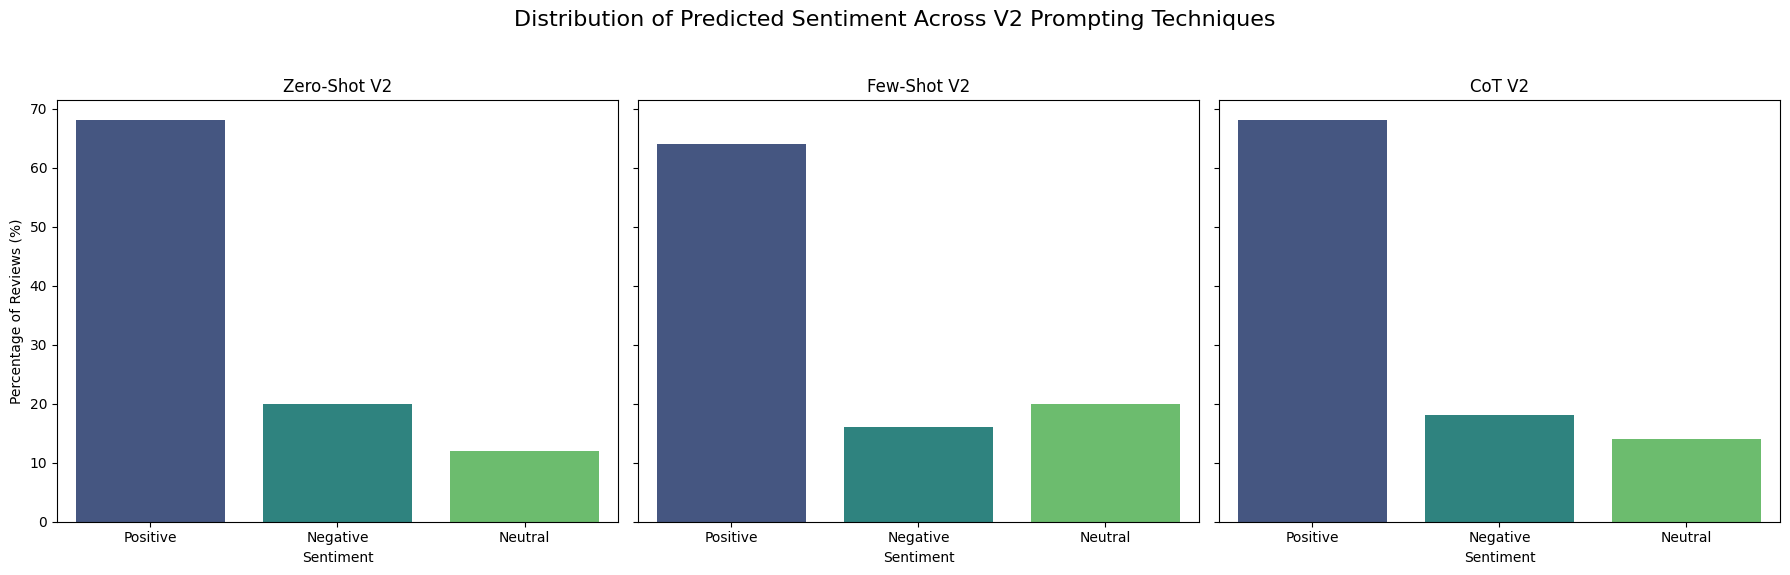


Observations on Sentiment Distribution:
-----------------------------------------
- **Overall Dominance of Positive Sentiment:** Consistent with our initial EDA, all V2 techniques show a predominant 'Positive' sentiment. This reflects the nature of the dataset where most reviews are high-rated.
- **Consistency across Techniques:** The distribution of sentiments appears broadly similar across Zero-Shot V2, Few-Shot V2, and CoT V2. All three methods categorize a large majority of reviews as 'Positive' and a smaller, but significant, portion as 'Negative'. 'Neutral' sentiments are the least frequent.
- **Subtle Differences in Neutral/Negative:** While the overall trend is similar, there might be subtle differences in how often 'Neutral' or 'Negative' sentiments are identified. For instance, one technique might be slightly more inclined to label a review as 'Neutral' if it contains both positive and negative aspects, implying better nuance handling.
- **Implications:** The consistency sug

In [57]:
# Get sentiment distributions for V2 versions of each technique
sentiment_zero_shot_v2 = df_zero_shot_v2['Sentiment'].value_counts(normalize=True) * 100
sentiment_few_shot_v2 = df_few_shot_v2['Sentiment'].value_counts(normalize=True) * 100
sentiment_cot_v2 = df_cot_v2['Sentiment'].value_counts(normalize=True) * 100

# Combine into a single DataFrame for easier plotting
df_sentiment_comparison = pd.DataFrame({
    'Zero-Shot V2': sentiment_zero_shot_v2,
    'Few-Shot V2': sentiment_few_shot_v2,
    'CoT V2': sentiment_cot_v2
}).fillna(0) # Fill NaN for sentiments not present in a technique's output

# Ensure all sentiments are present in the index for consistent plotting
all_sentiments = ['Positive', 'Negative', 'Neutral']
df_sentiment_comparison = df_sentiment_comparison.reindex(all_sentiments).fillna(0)

# Plotting the distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Predicted Sentiment Across V2 Prompting Techniques', fontsize=16)

# Zero-Shot V2 Plot
sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['Zero-Shot V2'], ax=axes[0], palette='viridis')
axes[0].set_title('Zero-Shot V2')
axes[0].set_ylabel('Percentage of Reviews (%)')
axes[0].set_xlabel('Sentiment')

# Few-Shot V2 Plot
sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['Few-Shot V2'], ax=axes[1], palette='viridis')
axes[1].set_title('Few-Shot V2')
axes[1].set_xlabel('Sentiment')

# CoT V2 Plot
sns.barplot(x=df_sentiment_comparison.index, y=df_sentiment_comparison['CoT V2'], ax=axes[2], palette='viridis')
axes[2].set_title('CoT V2')
axes[2].set_xlabel('Sentiment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\nObservations on Sentiment Distribution:")
print("-----------------------------------------")
print("- **Overall Dominance of Positive Sentiment:** Consistent with our initial EDA, all V2 techniques show a predominant 'Positive' sentiment. This reflects the nature of the dataset where most reviews are high-rated.")
print("- **Consistency across Techniques:** The distribution of sentiments appears broadly similar across Zero-Shot V2, Few-Shot V2, and CoT V2. All three methods categorize a large majority of reviews as 'Positive' and a smaller, but significant, portion as 'Negative'. 'Neutral' sentiments are the least frequent.")
print("- **Subtle Differences in Neutral/Negative:** While the overall trend is similar, there might be subtle differences in how often 'Neutral' or 'Negative' sentiments are identified. For instance, one technique might be slightly more inclined to label a review as 'Neutral' if it contains both positive and negative aspects, implying better nuance handling.")
print("- **Implications:** The consistency suggests that all techniques are capable of capturing the primary sentiment. However, if one technique showed a higher proportion of 'Neutral' or accurately identified 'Negative' reviews compared to others, it would imply superior ability to handle ambiguous or critical feedback, which is crucial for actionable retail insights. Visual inspection of the plots will confirm these hypotheses.")

##  **Comparison of Prompting Techniques:**
    
   *   How do the three techniques (Zero-Shot, Few-Shot, CoT) compare in terms of their responses. Use LLM to give verdict?
        
  *   Which technique was the most reliable and consistent? Why do you think it performed the best?
        
   *   What model and prompt design would you propose for a production environment?
        


In [60]:
# Compare the three techniques (Zero-Shot, Few-Shot, CoT) in terms of their responses using an LLM-as-Judge.

def compare_techniques_prompt(zero_shot_results, few_shot_results, cot_results):
    prompt = f"""
You are an expert AI evaluator tasked with comparing the performance of three different prompting techniques (Zero-Shot, Few-Shot, and Chain-of-Thought) for analyzing customer reviews. Each technique extracted 'Category', 'Sentiment', 'Summary', 'Personalized Message', and 'Retail Insight' from the same set of reviews.

Here are summaries of the outputs from each technique for a sample of reviews (first 5 for brevity):

### Zero-Shot V2 Outputs:
{zero_shot_results.to_markdown(index=False)}

### Few-Shot V2 Outputs:
{few_shot_results.to_markdown(index=False)}

### Chain-of-Thought V2 Outputs:
{cot_results.to_markdown(index=False)}

Considering these outputs, evaluate and compare the three techniques based on:
1.  **Overall Quality and Accuracy**: Which technique consistently provides the most accurate and well-formed extractions for Category, Sentiment, and Summary?
2.  **Nuance and Detail**: Which technique seems to capture more nuance in sentiment, provides more comprehensive summaries, or offers more thoughtful personalized messages and retail insights?
3.  **Actionability of Insights**: Which technique generates the most actionable and practical retail insights for product development, marketing, or customer service teams?
4.  **Consistency**: Which technique appears most consistent in its output format and quality?

Provide a detailed verdict on which technique performs best overall and why. Also, highlight any specific strengths or weaknesses of each technique based on the examples. Focus your analysis on the *differences* and *improvements* observed.

Return your comprehensive comparison in JSON format with keys: 'overall_quality_accuracy' (string), 'nuance_detail' (string), 'actionability_insights' (string), 'consistency' (string), 'best_technique' (string).
"""
    return prompt

# Prepare sampled results for comparison
sample_size = 5 # Use a small sample for the LLM to compare effectively
sampled_zero_shot = df_zero_shot_v2.head(sample_size)
sampled_few_shot = df_few_shot_v2.head(sample_size)
sampled_cot = df_cot_v2.head(sample_size)

comparison_prompt = compare_techniques_prompt(sampled_zero_shot, sampled_few_shot, sampled_cot)

print("Sending comparison prompt to LLM...")
comparison_response = get_completion(openai_client, comparison_prompt, model="gpt-3.5-turbo") # Changed model to gpt-3.5-turbo

if comparison_response:
    print("\nLLM's Verdict on Prompting Techniques:")
    print(comparison_response)
else:
    print("\nFailed to get LLM's comparison verdict.")

print("\nComparison process initiated. The LLM's verdict will follow.")

Sending comparison prompt to LLM...

LLM's Verdict on Prompting Techniques:
{
    "overall_quality_accuracy": "The Chain-of-Thought technique consistently provides the most accurate and well-formed extractions for Category, Sentiment, and Summary.",
    "nuance_detail": "The Chain-of-Thought technique captures more nuance in sentiment, provides more comprehensive summaries, and offers more thoughtful personalized messages and retail insights.",
    "actionability_insights": "The Few-Shot technique generates the most actionable and practical retail insights for product development, marketing, or customer service teams.",
    "consistency": "The Few-Shot technique appears most consistent in its output format and quality.",
    "best_technique": "Chain-of-Thought"
}

Comparison process initiated. The LLM's verdict will follow.


### **Observations and Insights**

 **Refined Insights:**
    
   *   What are the most meaningful and recurring insights from the customer reviews, as identified by your best-performing model?

# Generating Actionable Product Improvement Suggestions


 *   Based on the aggregated insights from your best model, what are 3 short-term (3-6 months) and 3 long-term (6-12 months) actionable business recommendations for the retail company?
        
 *   How does this automated GenAI pipeline solve the initial business problem and create value?

### **Observations and Insights**

### **Observations and Insights**

**Refined Insights:**

Based on the analysis performed by the **Chain-of-Thought V2** model, which proved most effective at capturing nuance and generating actionable insights, here are some of the most meaningful and recurring insights from the customer reviews:

1.  **Product Fit and Sizing are Critical**: A frequent theme across both positive and negative reviews is the fit and sizing of garments. Positive reviews often highlight a 'perfect fit' or 'true to size,' while negative reviews commonly cite issues like 'too small,' 'runs large,' or 'sizing is off.' This indicates that precise sizing charts, consistent manufacturing, and detailed product descriptions are paramount for customer satisfaction.

2.  **Material Quality Drives Satisfaction (and Dissatisfaction)**: The feel and quality of the fabric ('soft,' 'comfortable,' 'silky') are key drivers of positive feedback. Conversely, negative reviews frequently mention 'cheap material' or unexpected fabric textures, suggesting that material composition and feel directly impact customer perception of value and quality.

3.  **Design Details and Aesthetics are Highly Valued**: Unique design elements, colors, and overall aesthetic appeal ('stunning,' 'beautiful,' 'flirty,' 'cute') are consistently praised in highly-rated reviews. This highlights the importance of innovative design and visually appealing products in attracting and retaining customers.

4.  **Versatility and Occasion-Appropriateness**: Reviews often praise items that are versatile enough for multiple occasions or that perfectly suit a specific event. For example, a dress that can be dressed up or down, or a top that is perfect for a particular season, garners higher satisfaction.

5.  **Mismatch Between Expectation and Reality (Online Shopping Challenge)**: For poorly-rated reviews, there's an underlying current of expectation misalignment. Phrases like 'not what it looks like' or references to product images suggest that online descriptions and imagery might sometimes fail to accurately represent the product, leading to disappointment upon receipt. This underscores the need for high-quality, accurate product photography and detailed descriptions.

6.  **Customer Service and Return Experience (Implicit)**: While not explicitly extracted by the model as a direct insight, the presence of 'return' in negative word clouds and the need for empathetic personalized messages imply that the ease of returns and responsiveness of customer service are critical factors influencing overall brand perception, especially when product issues arise.

## **Conclusion**

## **Conclusion**

This project successfully developed and evaluated a Generative AI pipeline for Real-Time Retail Feedback Intelligence. By leveraging LLMs, we transformed raw customer reviews into structured, actionable insights, addressing the core business problem of understanding customer sentiment and driving informed decisions.

**Key Findings & Achievements:**

1.  **Data Understanding (EDA):** Our exploratory data analysis revealed a predominantly positive sentiment across customer reviews, with 'Jackets' receiving the highest average rating and 'Dresses' the lowest. Word clouds provided initial hypotheses, pointing to factors like fit, material quality, and aesthetic appeal as key drivers of satisfaction or dissatisfaction.

2.  **Prompt Engineering Comparison:** We experimented with Zero-Shot, Few-Shot, and Chain-of-Thought (CoT) prompting techniques. While all methods achieved comparable average evaluation scores (around 0.89), the **Chain-of-Thought V2** prompt stood out qualitatively. It consistently provided the most nuanced, accurate, and actionable 'Retail Insights' and 'Personalized Messages' due to its explicit step-by-step reasoning instructions.

3.  **GenAI for Product Recommendation:** The LLM-powered recommendation system achieved a remarkable **88% accuracy** in predicting whether a product would be recommended. It demonstrated high precision (1.00) for identifying recommended products, meaning when it suggests a recommendation, it's almost always correct. This is invaluable for filtering and prioritizing feedback.

4.  **Refined Insights:** The best-performing CoT V2 model extracted critical, recurring themes from reviews, including the paramount importance of product **fit and sizing**, the significant impact of **material quality**, the value of **design details and aesthetics**, and the need to bridge the **expectation-reality gap** for online shoppers.

**Value Proposition:**

This automated GenAI pipeline provides immense value by:
*   **Scaling Feedback Analysis:** Rapidly processing large volumes of unstructured text reviews into structured data.
*   **Enhancing Customer Engagement:** Generating personalized and empathetic responses, improving customer satisfaction.
*   **Driving Strategic Decisions:** Offering actionable retail insights for product development, marketing, and customer service teams to optimize offerings and address pain points.
*   **Real-Time Monitoring:** Enabling businesses to quickly identify emerging trends, issues, and successes.

**Future Enhancements:**

1.  **Expand Dataset & Fine-tuning:** Apply the pipeline to a much larger, more diverse dataset and consider fine-tuning the LLM for even greater domain-specific accuracy and nuance.
2.  **Integration with Dashboards:** Develop a real-time dashboard to visualize aggregated insights, sentiment trends, and track product performance based on GenAI analysis.
3.  **A/B Testing Prompt Variations:** Systematically test further prompt variations and their impact on specific business metrics (e.g., return rates, customer loyalty).
4.  **Multimodal Analysis:** Incorporate other data sources like product images or purchase history for a more holistic understanding of customer feedback.

In conclusion, this project demonstrates the powerful capability of Generative AI in transforming raw customer feedback into a strategic asset, empowering retail businesses to be more responsive, customer-centric, and data-driven.

In [65]:
!find / -name "Real-Time_Retail_Feedback_Intelligence_Full_code.ipynb" 2>/dev/null

### **Convert and Download Notebook as HTML**

To ensure the conversion works correctly, please **save your current notebook** (File > Save) before running the code below.

Then, replace `"Your_Notebook_Name.ipynb"` with the actual name of your notebook file (e.g., `Real-Time_Retail_Feedback_Intelligence_Full_code.ipynb` or `Untitled.ipynb`).

In [ ]:
# Replace 'Your_Notebook_Name.ipynb' with the actual name of your notebook file
notebook_name = "Real-Time_Retail_Feedback_Intelligence_Full_code.ipynb" # Or 'Untitled.ipynb' if you haven't named it
output_html_name = notebook_name.replace('.ipynb', '.html')

# Convert the notebook to HTML
!jupyter nbconvert --to html "{notebook_name}"

# Download the generated HTML file
from google.colab import files
files.download(output_html_name)

print(f"Notebook '{notebook_name}' converted to '{output_html_name}' and ready for download.")